# **Welcome to Before You Train- Getting to Know Your Data**
###**By [Dina Bavli](https://www.linkedin.com/in/dina-bavli-502430158/)**

In this session we will learn ways for getting to know your data.

####**Data is based on the IEEE-CIS [Fraud](https://www.kaggle.com/c/ieee-fraud-detection/overview) Detection Kaggle competition dataset.**


## **You shouldn't run all of this notebook at once!**
It might crash

You can always save what ever version you like and start over for another version using this syntax:


```
#Connect to drive
from google.colab import drive 
drive.mount('/content/gdrive')

#Saving to drive
df_trans.to_csv('gdrive/My Drive/Colab Notebooks/fillna_dist_trans_outclip.csv',index=False,compression='gzip')


#Reading from drive
df_trans=pd.read_csv('gdrive/My Drive/Colab Notebooks/fillna_dist_trans_outclip.csv',compression='gzip')


```
**Enjoy :0)** 

![alt text](https://i.pinimg.com/564x/47/92/c5/4792c57479eb80b494f864a2ee39a244.jpg)





**Objective is to detect fraud in transactions;**

***Categorical Features***


*   ProductCD
*   emaildomain
*   card1 - card6
*   addr1, addr2
* P_emaildomain  
*   R_emaildomain
* M1 - M9  
* DeviceType
*   DeviceInfo
*  id_12 - id_38


The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

id01-id11: network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization

##Loading The Data

In [ ]:
# Script used to download data from Google Drive
!wget https://gist.githubusercontent.com/guysmoilov/ff68ef3416f99bd74a3c431b4f4c739a/raw/4587c1306e00a576037379ee410d6c35f3daada6/gdrive_download.sh

# Download from https://drive.google.com/uc?export=download&id=1vFNmOtuP0kMbYOlOITkgdfwK1YwLlYv1
!bash -c "source gdrive_download.sh && gdrive_download 1vFNmOtuP0kMbYOlOITkgdfwK1YwLlYv1 ./fraud_data_base.csv.gz"

# Unzip it
!gunzip ./fraud_data_base.csv.gz

--2020-02-24 17:51:13--  https://gist.githubusercontent.com/guysmoilov/ff68ef3416f99bd74a3c431b4f4c739a/raw/4587c1306e00a576037379ee410d6c35f3daada6/gdrive_download.sh
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 434 [text/plain]
Saving to: ‘gdrive_download.sh.2’

gdrive_download.sh. 100%[===================>]     434  --.-KB/s    in 0s      

2020-02-24 17:51:13 (133 MB/s) - ‘gdrive_download.sh.2’ saved [434/434]

--2020-02-24 17:51:14--  https://drive.google.com/uc?export=download&confirm=yJCp&id=1vFNmOtuP0kMbYOlOITkgdfwK1YwLlYv1
Resolving drive.google.com (drive.google.com)... 74.125.31.139, 74.125.31.101, 74.125.31.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.139|:443... connected.
HTTP request sent, awaiting response... 302 Mov

##Seting Up

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
data = pd.read_csv('./fraud_data_base.csv')
data

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,...,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,_Weekdays,_Hours,_Days,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,device_name,had_id,_Month
0,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,NaN,NaN,NaN,NaN,NaN,1,12
1,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,google,com,NaN,NaN,NaN,1,12
2,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,microsoft,com,NaN,NaN,NaN,1,12
3,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,yahoo,com,NaN,NaN,NaN,1,12
4,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android,Samsung,32.0,2220x1080,match_status:2,T,F,T,T,mobile,5,0,2,google,com,NaN,NaN,Samsung,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,NaN,NaN,NaN,NaN,NaN,1,6
590536,0,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,google,com,NaN,NaN,NaN,1,6
590537,0,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,google,com,NaN,NaN,NaN,1,6
590538,0,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,aol,com,NaN,NaN,NaN,1,6


In [ ]:
data.columns

Index(['isFraud', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3',
       'card4', 'card5', 'card6', 'addr1',
       ...
       '_Weekdays', '_Hours', '_Days', 'P_emaildomain_bin',
       'P_emaildomain_suffix', 'R_emaildomain_bin', 'R_emaildomain_suffix',
       'device_name', 'had_id', '_Month'],
      dtype='object', length=439)

## Set Columns Type

In [ ]:
cat_cols=['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       '_Weekdays', '_Hours', '_Days', 'P_emaildomain_bin',
       'P_emaildomain_suffix', 'R_emaildomain_bin', 'R_emaildomain_suffix',
       'device_name', 'had_id', '_Month']

In [ ]:
for i in range(len(cat_cols)):
  col = cat_cols[i]
  data[col] = data[col].astype(str) 

In [ ]:
object_cols = data.select_dtypes(include = ['object']).columns
len(object_cols)

48

In [ ]:
numeric_cols = data.select_dtypes(exclude = ['object'])

In [ ]:
int_cols = set(data.select_dtypes(include = ['integer']).columns)
int_cols

{'isFraud'}

In [ ]:
int_cols.remove('isFraud')

In [ ]:
df_integers= data[list(int_cols)]

In [ ]:
float_cols = data.select_dtypes(include=['floating']).columns
len(float_cols)

390

In [ ]:
float_to_int_cols = set()
for col in float_cols:
  col_df = data[col].dropna()
  col_should_be_int = col_df.map(float.is_integer).all() 
  if col_should_be_int:
    float_to_int_cols.add(col)

In [ ]:
len(float_to_int_cols)

310

In [ ]:
 int_cols = int_cols.union(float_to_int_cols)
 len(int_cols)

310

## **Exploratory data analysis**

Try this [visualization-guide](https://github.com/cmawer/pycon-2017-eda-tutorial/blob/master/EDA-cheat-sheet.md#visualization-guide)

In [ ]:
cat_cols=['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28',
       'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       '_Weekdays', '_Hours', '_Days', 'P_emaildomain_bin',
       'P_emaildomain_suffix', 'R_emaildomain_bin', 'R_emaildomain_suffix',
       'device_name', 'had_id', '_Month']

In [ ]:
for i in range(len(cat_cols)):
  col=cat_cols[i]
  data[col]=data[col].astype(str) 

In [ ]:
object_cols = data.select_dtypes(include=['object']).columns
len(object_cols)

48

In [ ]:
count_integers=len(data.select_dtypes(include=['integer']).columns)
print('There are ' + str(count_integers) +' columns of type integer')
count_float=len(data.select_dtypes(include=['floating']).columns)
print('There are ' + str(count_float) +' columns of type float')
count_category=len(data.select_dtypes(include=['object']).columns)
print('There are ' + str(count_category) +' columns of type object')
print('Total ' + str(count_category+count_float+count_integers))

There are 1 columns of type integer
There are 321 columns of type float
There are 46 columns of type object
Total 368


In [ ]:
data

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,_Weekdays,_Hours,_Days,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,device_name,had_id,_Month
0,0,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,T,T,T,M2,...,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,NaN,NaN,NaN,NaN,NaN,1,12
1,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,google,com,NaN,NaN,NaN,1,12
2,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,315.0,315.0,T,T,T,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,microsoft,com,NaN,NaN,NaN,1,12
3,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,NaN,111.0,NaN,NaN,NaN,M0,...,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,2,yahoo,com,NaN,NaN,NaN,1,12
4,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,70787.0,NaN,NaN,100.0,NotFound,NaN,New,NotFound,166.0,542.0,144.0,New,NotFound,Samsung,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,5,0,2,google,com,NaN,NaN,Samsung,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,56.0,56.0,56.0,T,T,T,M0,...,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,NaN,NaN,NaN,NaN,NaN,1,6
590536,0,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,T,F,F,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,google,com,NaN,NaN,NaN,1,6
590537,0,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,T,F,F,NaN,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,23,1,google,com,NaN,NaN,NaN,1,6
590538,0,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1

In [ ]:
data.isnull().sum().sum()

78497545

In [ ]:
data3=data.copy()

In [ ]:
int_cols=set(data.select_dtypes(include=['integer']).columns)
int_cols

{'isFraud'}

In [ ]:
int_cols.remove('isFraud')

In [ ]:
float_cols = data.select_dtypes(include=['floating']).columns
len(float_cols)

390

In [ ]:
float_to_int_cols=set()
for col in float_cols:
  col_df = data[col].dropna()
  col_should_be_int = col_df.map(float.is_integer).all() 
  if col_should_be_int:
    float_to_int_cols.add(col)

In [ ]:
len(float_to_int_cols)

310

In [ ]:
 int_cols=int_cols.union(float_to_int_cols)
 len(int_cols)

310

In [ ]:
df_integers= data[list(int_cols)]

In [ ]:
df_integers.shape

(590540, 260)

In [ ]:
df_integers

,V36,V219,V1,V60,V85,V122,V288,V255,V79,V56,V257,C14,D15,V52,V172,V186,C7,D10,V201,V41,V94,V236,D1,V9,C4,C9,V65,V53,V61,V242,V293,V305,V4,V32,V84,V229,V39,V38,V23,V249,...,V111,V170,V3,V62,V27,V99,V180,V123,V223,V237,V40,V121,V17,V66,V110,V302,V199,id_05,V290,V7,V74,V234,V42,V89,V233,V87,V193,V15,V51,V69,V72,V21,V101,V169,V240,V241,V119,V109,V2,V185
0,NaN,NaN,1.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,0.0,NaN,NaN,NaN,0.0,13.0,NaN,NaN,0.0,NaN,14.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
1,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,NaN,0.0,0.0,1.0,0.0,1.0,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,NaN,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
2,1.0,NaN,1.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,315.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
3,1.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,111.0,0.0,NaN,NaN,0.0,84.0,NaN,1.0,0.0,NaN,112.0,NaN,0.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,NaN,1.0,0.0,10.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4,NaN,0.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,0.0,NaN,1.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,NaN,NaN,1.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,2.0,56.0,NaN,NaN,NaN,0.0,56.0,NaN,NaN,0.0,NaN,29.0,1.0,0.0,2.0,1.0,1.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,1.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
590536,1.0,NaN,1.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
590537,1.0,NaN,1.0,0.0,0.0,1.0,0.0,NaN,0.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,0.0,1.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,1.0,1.0,0.0,0.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,0.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN
590538,1.0,NaN,1.0,0.0,0.0,1.0,1.0,NaN,0.0,1.0,NaN,1.0,22.0,1.0,NaN,NaN,0.0,22.0,NaN,1.0,0.0,NaN,22.0,1.0,0.0,2.0,1.0,1.0,2.0,NaN,0.0,1.0,2.0,0.0,0.0,NaN,0.0,1.0,1.0,NaN,...,1.0,NaN,1.0,2.0,0.0,1.0,NaN,1.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,1.0,1.0,1.0,NaN,0.0,0.0,NaN,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN


In [ ]:
len(df_integers)

590540

In [ ]:
data_null = data.isnull().sum()/len(data)
data_null = data_null.drop(data_null[data_null == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio': data_null})
missing_data.head()

,Missing Ratio
id_24,0.991962
id_25,0.991310
id_07,0.991271
id_08,0.991271
id_21,0.991264


In [ ]:
data.dtypes

In [ ]:
missing_data.shape

(414, 1)

Most of columns have missing data, which is normal in real world. Also there are columns with one unique value (or all missing). 

Text(0, 0.5, 'Missing rate')

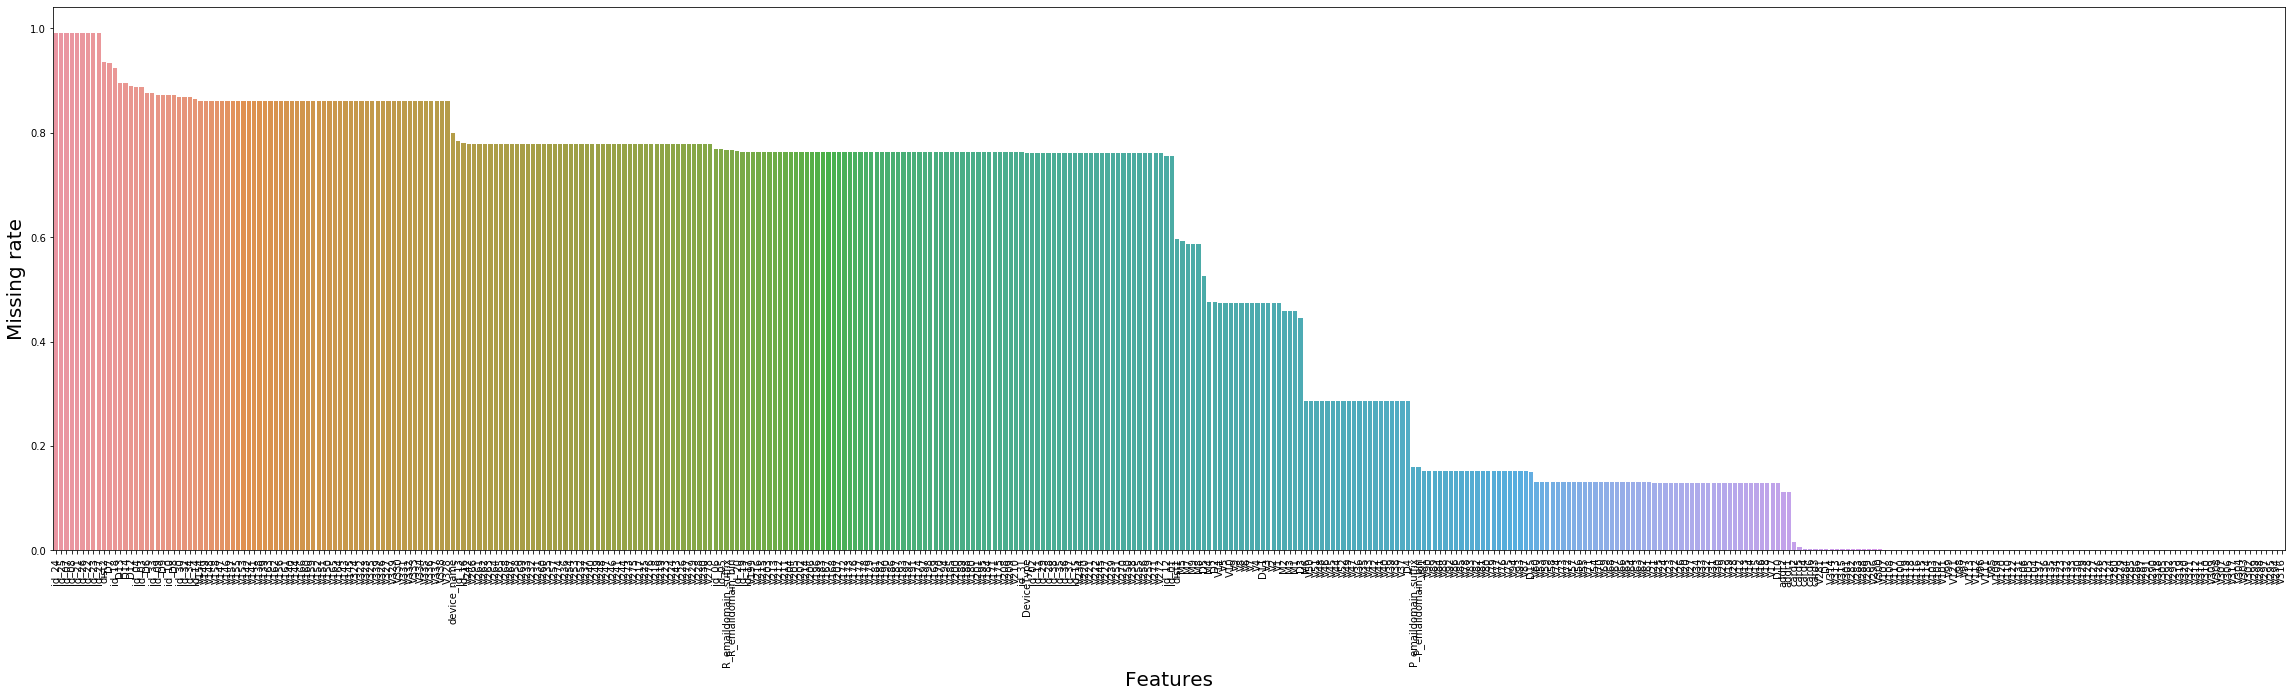

In [ ]:
plt.subplots(figsize=(40,10))
plt.xticks(rotation='90')
sns.barplot(data_null.index, data_null)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Missing rate', fontsize=20)

##Understanding Cardinality





In [ ]:
data['card4'].nunique()

5

In [ ]:
data['card4'].unique()

array(['discover', 'mastercard', 'visa', 'american express', 'nan'],
      dtype=object)

In [ ]:
 data['card4'].value_counts() 


visa                384767
mastercard          189217
american express      8328
discover              6651
nan                   1577
Name: card4, dtype: int64

There are a lot of continuous variables and some categorical. Let's have a closer look at them.
##Data Exploration:

 id_01 - id_11 are continuous variables, id_12 - id_38 are categorical and the last two columns are obviously also categorical.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


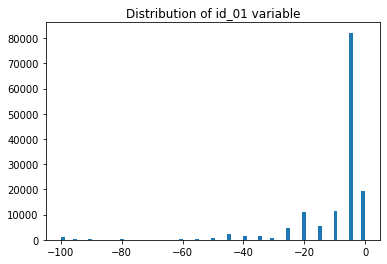

In [ ]:
plt.hist(data['id_01'], bins=77);
plt.title('Distribution of id_01 variable');

##Quantiles

In [ ]:
data['TransactionAmt'] = data['TransactionAmt'].astype(float)
print("Transaction Amounts Quantiles:")
print(data['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amounts Quantiles:
0.010       9.2440
0.025      14.5010
0.100      25.9500
0.250      43.3210
0.500      68.7690
0.750     125.0000
0.900     275.2930
0.975     648.3345
0.990    1104.0000
Name: TransactionAmt, dtype: float64


<Figure size 1152x864 with 0 Axes>

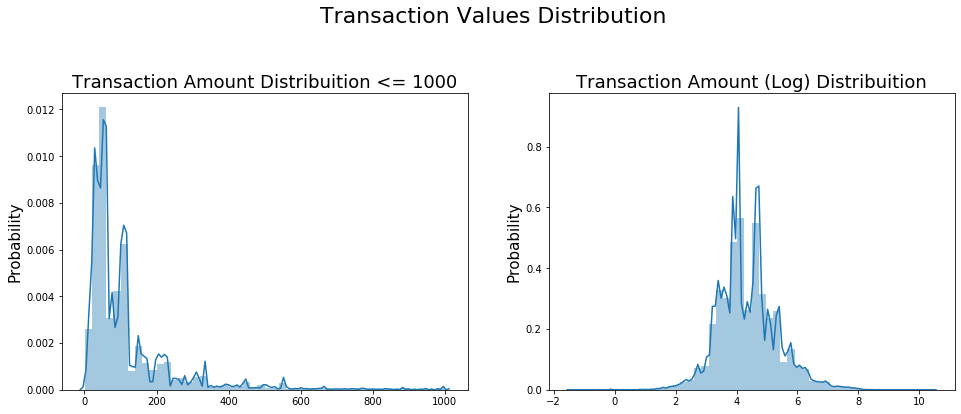

<Figure size 1152x864 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(data[data['TransactionAmt'] <= 1000]['TransactionAmt'])
g.set_title("Transaction Amount Distribuition <= 1000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)
g1 = sns.distplot(np.log(data['TransactionAmt']))
g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
g1.set_xlabel("")
g1.set_ylabel("Probability", fontsize=15)

plt.figure(figsize=(16,12))

##Card 4 - Categorical


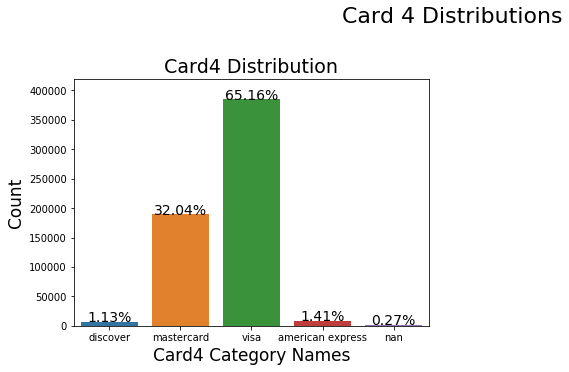

In [ ]:
plt.figure(figsize=(14,10))
plt.suptitle('Card 4 Distributions', fontsize=22)
total = len(data)
plt.subplot(221)
g = sns.countplot(x='card4', data=data)
g.set_title("Card4 Distribution", fontsize=19)
g.set_ylim(0,420000)
g.set_xlabel("Card4 Category Names", fontsize=17)
g.set_ylabel("Count", fontsize=17)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center",fontsize=14) 

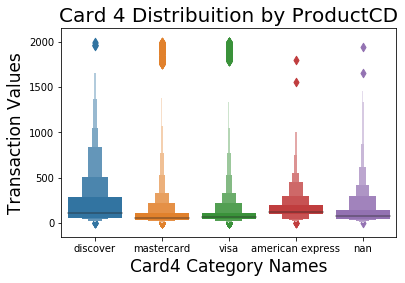

In [ ]:
g3 = sns.boxenplot(x='card4', y='TransactionAmt', 
              data=data[data['TransactionAmt'] <= 2000] )
g3.set_title("Card 4 Distribuition by ProductCD", fontsize=20)
g3.set_xlabel("Card4 Category Names", fontsize=17)
g3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()

##DeviceType


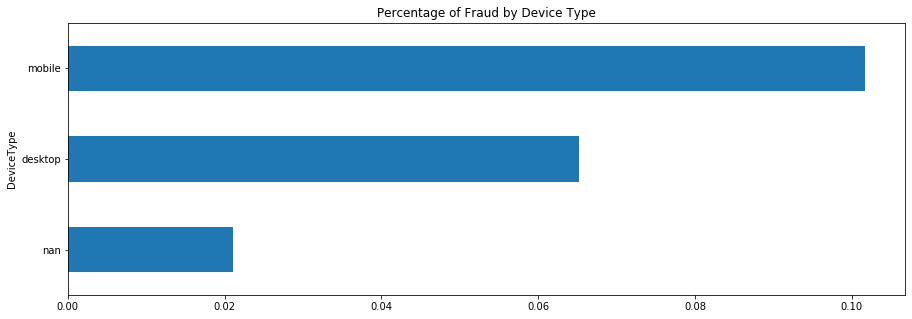

In [ ]:
data.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 5),
          title='Percentage of Fraud by Device Type')
plt.show()

##Now, let's known the Product Feature


*  Distribution Products
*   Distribution of Frauds by Product

*   Has Difference between Transaction Amounts in Products?

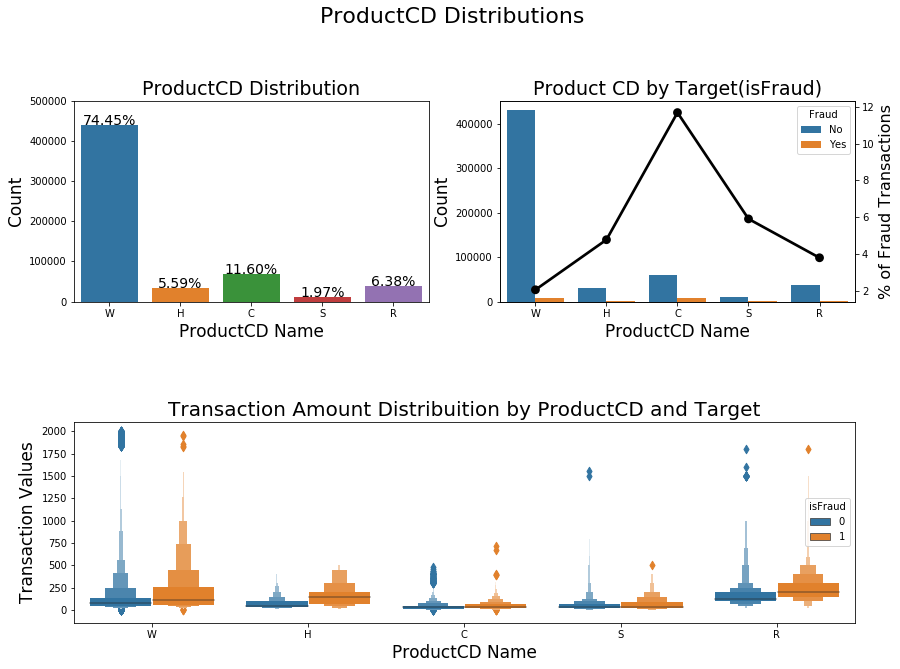

In [ ]:
tmp = pd.crosstab(data['ProductCD'], data['isFraud'], normalize='index') * 100
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)

plt.figure(figsize=(14,10))
plt.suptitle('ProductCD Distributions', fontsize=22)

plt.subplot(221)
g = sns.countplot(x='ProductCD', data=data)
# plt.legend(title='Fraud', loc='upper center', labels=['No', 'Yes'])

g.set_title("ProductCD Distribution", fontsize=19)
g.set_xlabel("ProductCD Name", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_ylim(0,500000)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 

plt.subplot(222)
g1 = sns.countplot(x='ProductCD', hue='isFraud', data=data)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
gt = g1.twinx()
gt = sns.pointplot(x='ProductCD', y='Fraud', data=tmp, color='black', order=['W', 'H',"C", "S", "R"], legend=False)
gt.set_ylabel("% of Fraud Transactions", fontsize=16)

g1.set_title("Product CD by Target(isFraud)", fontsize=19)
g1.set_xlabel("ProductCD Name", fontsize=17)
g1.set_ylabel("Count", fontsize=17)

plt.subplot(212)
g3 = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', 
              data=data[data['TransactionAmt'] <= 2000] )
g3.set_title("Transaction Amount Distribuition by ProductCD and Target", fontsize=20)
g3.set_xlabel("ProductCD Name", fontsize=17)
g3.set_ylabel("Transaction Values", fontsize=17)

plt.subplots_adjust(hspace = 0.6, top = 0.85)

plt.show()


##TimeDelta Feature
Let's see if the frauds have some specific hour that has highest % of frauds
###Converting to Total Days, Weekdays and Hours
In discussions tab I read an excellent solution to Timedelta column, I will set the [link below](https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt);
We will use the first date as 2017-12-01 and use the delta time to compute datetime features.

This dataset is atfer data preperation

In [ ]:
total_amt = data.groupby(['isFraud'])['TransactionAmt'].sum().sum()
def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

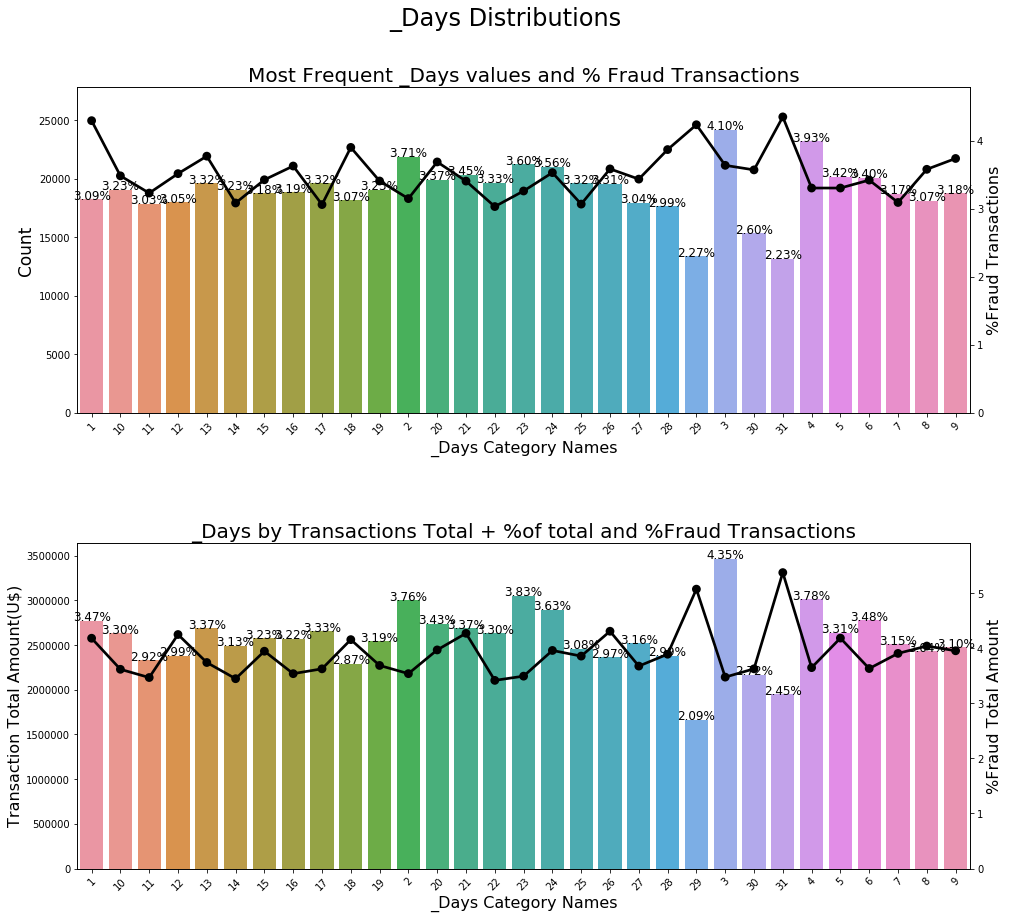

In [ ]:
ploting_cnt_amt(data, '_Days')

##Making EDA Table

In [ ]:
data_describe=data.describe()

In [ ]:
data_describe.round(2).head(10)

,isFraud,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,...,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_14,id_18,id_21,id_22,id_24,id_25,id_26,id_32
count,590540.00,590540.00,238269.00,37627.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,589271.00,309743.00,327662.00,421618.0,280699.00,73187.00,38917.00,74926.00,74926.00,514518.00,311253.00,64717.00,61952.00,62187.00,501427.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,...,590528.00,590528.00,590528.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,82351.00,144233.00,140872.00,66324.00,66324.00,136865.00,136865.00,5155.00,5155.00,74926.00,74926.00,140978.00,80044.00,45113.00,5159.00,5169.0,4747.00,5132.00,5163.00,77586.00
mean,0.03,135.03,118.50,231.86,14.09,15.27,0.01,4.09,5.57,9.07,2.85,5.14,4.48,5.24,10.24,4.08,32.54,8.30,94.35,169.56,28.34,140.0,42.34,69.81,41.64,146.06,0.56,123.98,146.62,54.04,17.90,57.72,163.74,1.00,1.05,1.08,0.85,0.88,1.05,1.07,...,18.37,42.07,28.33,6.22,13.10,9.18,0.06,0.85,0.30,0.34,1.31,0.78,721.74,1375.78,1014.62,9.81,59.16,28.53,55.35,151.16,100.70,-10.17,174716.58,0.06,-0.06,1.62,-6.70,13.29,-38.60,0.09,-0.30,99.75,-344.51,14.24,368.27,16.0,12.80,329.61,149.07,26.51
std,0.18,239.16,371.87,529.05,133.57,154.67,0.15,68.85,25.79,71.51,61.73,95.38,16.67,95.58,94.34,86.67,129.36,49.54,157.66,177.32,62.38,191.1,89.00,143.67,99.74,231.66,0.32,182.62,186.04,124.27,67.61,136.31,202.73,0.01,0.24,0.32,0.44,0.48,0.24,0.30,...,332.30,473.50,382.05,56.02,106.74,73.63,0.30,3.95,1.36,1.58,8.77,4.73,6217.22,11169.28,7955.74,243.86,387.63,274.58,668.49,1095.03,814.95,14.35,159651.82,0.60,0.70,5.25,16.49,11.38,26.08,0.98,2.79,1.13,93.70,1.56,198.85,6.9,2.37,97.46,32.10,3.74
min,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-122.0,0.00,-83.00,0.00,0.00,0.00,0.00,-53.00,-83.00,0.00,-193.00,-83.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-100.00,1.00,-13.00,-28.00,-72.00,-100.00,-46.00,-100.00,-36.00,-100.00,90.00,-660.00,10.00,100.00,10.0,11.00,100.00,100.00,0.00
25%,0.00,43.32,3.00,7.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,26.00,1.00,0.0,1.00,0.00,0.00,0.96,0.21,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-10.00,67992.00,0.00,0.00,0.00,-6.00,5.00,-48.00,0.00,0.00,100.00,-360.00,13.00,252.00,14.0,11.00,321.00,119.00,24.00
50%,0.00,68.77,8.00,37.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,3.00,1.00,3.00,97.00,8.00,26.0,10.00,0.00,0.00,37.88,0.67,15.00,43.00,0.00,0.00,0.00,52.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,125800.50,0.00,0.00,0.00,0.00,14.00,-34.00,0.00,0.00,100.00,-300.00,15.00,252.00,14.0,11.00,321.00,149.00,24.00
75%,0.00,125.00,24.00,206.00,3.00,3.00,0.00,0.00,1.00,2.00,0.00,0.00,2.00,0.00,2.00,0.00,12.00,2.00,122.00,276.00,27.00,253.0,32.00,40.00,17.00,187.96,0.83,197.00,274.00,13.00,0.00,2.00,314.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,228749.00,0.00,0.00,1.00,0.00,22.00,-23.00,0.00,0.00,100.00,-300.00,15.00,486.50,14.0,15.00,371.00,169.00,32.00
max,1.00,31937.39,10286.00,11623.00,4685.00,5691.00,26.00,2253.00,349.00,2253.00,2255.00,3331.00,

In [ ]:
data_describe = data_describe.T


In [ ]:
data_describe.head()

,count,mean,std,min,25%,50%,75%,max
isFraud,590540.0,0.034990,0.183755,0.000,0.000,0.000,0.0,1.000
TransactionAmt,590540.0,135.027176,239.162522,0.251,43.321,68.769,125.0,31937.391
dist1,238269.0,118.502180,371.872026,0.000,3.000,8.000,24.0,10286.000
dist2,37627.0,231.855423,529.053494,0.000,7.000,37.000,206.0,11623.000
C1,590540.0,14.092458,133.569018,0.000,1.000,1.000,3.0,4685.000


In [ ]:
df_numeric=data._get_numeric_data()
corr_with_target=df_numeric.drop("isFraud", axis=1).apply(lambda x: x.corr(df_numeric.isFraud))
data_describe['corr_with_target']=corr_with_target
dtype_df=df_numeric.dtypes
data_describe['dtypes']=dtype_df
data_null = df_numeric.isnull().sum()/len(data) * 100
data_describe['Missing %']=data_null
Cardinality=df_numeric.apply(pd.Series.nunique)
data_describe['Cardinality']=Cardinality
df_skew=df_numeric.skew(axis = 0, skipna = True) 
#print(df_skew)
data_describe['Skew']=df_skew


In [ ]:
skewness, pvalue=stats.skewtest(df_numeric, axis=0, nan_policy = 'omit')
#print(df_skewtest[1])
data_describe['skewness']=skewness
data_describe['pvalue']=pvalue

In [ ]:
data_describe.head()

,count,mean,std,min,25%,50%,75%,max,corr_with_target,dtypes,Missing %,Cardinality,Skew,skewness,pvalue
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06,0.014166,int64,0.0,590540,-5.971843e-17,-2.843986e-14,1.000000e+00
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00,NaN,int64,0.0,2,5.061223e+00,6.465336e+02,0.000000e+00
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07,0.013103,int64,0.0,573349,1.311547e-01,4.097202e+01,0.000000e+00
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04,0.011320,float64,0.0,20902,1.437449e+01,9.124847e+02,0.000000e+00
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04,-0.013640,int64,0.0,13553,-4.092898e-02,-1.283520e+01,1.041313e-37


In [ ]:
def outlier(data):

  # calculate summary statistics
  data_mean, data_std = mean(data), std(data)
  # identify outliers
  cut_off = data_std * 3
  lower, upper = data_mean - cut_off, data_mean + cut_off
  # identify outliers
  outliers = [x for x in data if x < lower or x > upper]
  #print('Identified outliers: %d' % len(outliers))
  #print(outliers)
  # remove outliers
  outliers_removed = [x for x in data if x >= lower and x <= upper]
  #print('Non-outlier observations: %d' % len(outliers_removed))
  return len(outliers)


In [ ]:
outliers=[]
for col in df_numeric.columns:
  outliers.append(outlier(df_numeric[col]))

In [ ]:
data_describe['outliers']=outliers

In [ ]:
kurt_value=kurtosis(df_numeric)

In [ ]:
data_describe['kurtosis']=kurt_value

In [ ]:
data_describe.head()

,count,mean,std,min,25%,50%,75%,max,corr_with_target,dtypes,Missing %,Cardinality,Skew,skewness,pvalue,outliers,kurtosis
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3134634.750,3282269.500,3429904.25,3.577539e+06,0.014166,int64,0.0,590540,-5.971843e-17,-2.843986e-14,1.000000e+00,0,-1.200000
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000,0.000,0.00,1.000000e+00,NaN,int64,0.0,2,5.061223e+00,6.465336e+02,0.000000e+00,20663,23.615845
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3027057.750,7306527.500,11246620.00,1.581113e+07,0.013103,int64,0.0,573349,1.311547e-01,4.097202e+01,0.000000e+00,0,-1.229137
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,43.321,68.769,125.00,3.193739e+04,0.011320,float64,0.0,20902,1.437449e+01,9.124847e+02,0.000000e+00,10093,1123.947381
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6019.000,9678.000,14184.00,1.839600e+04,-0.013640,int64,0.0,13553,-4.092898e-02,-1.283520e+01,1.041313e-37,0,-1.136158


In [ ]:
data_describe

,count,mean,std,min,25%,50%,75%,max,corr_with_target,dtypes,Missing %,Cardinality,Skewtest,outliers
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3.134635e+06,3.282270e+06,3.429904e+06,3.577539e+06,0.014166,int64,0.000000,590540,-5.971843e-17,0
isFraud,590540.0,3.499001e-02,1.837546e-01,0.000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,NaN,int64,0.000000,2,5.061223e+00,20663
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3.027058e+06,7.306528e+06,1.124662e+07,1.581113e+07,0.013103,int64,0.000000,573349,1.311547e-01,0
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,4.332100e+01,6.876900e+01,1.250000e+02,3.193739e+04,0.011320,float64,0.000000,20902,1.437449e+01,10093
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6.019000e+03,9.678000e+03,1.418400e+04,1.839600e+04,-0.013640,int64,0.000000,13553,-4.092898e-02,0
card2,581607.0,3.625555e+02,1.577932e+02,100.000,2.140000e+02,3.610000e+02,5.120000e+02,6.000000e+02,0.003388,float64,1.512683,500,-2.000086e-01,0
card3,588975.0,1.531949e+02,1.133644e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02,0.154151,float64,0.265012,114,2.019326e+00,5752
card5,586281.0,1.992789e+02,4.124445e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02,-0.033580,float64,0.721204,119,-1.224602e+00,0
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02,0.005596,float64,11.126427,332,3.724553e-01,0
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02,-0.030387,float64,11.126427,74,-1.450115e+01,4337


In [ ]:
data_describe.round(2)

,count,mean,std,min,25%,50%,75%,max,corr_with_target,dtypes,Missing %,Cardinality,Skew,skewness,pvalue,outliers,kurtosis
TransactionID,590540.0,3282269.50,170474.36,2987000.00,3134634.75,3282269.50,3429904.25,3577539.00,0.01,int64,0.00,590540,-0.00,-0.00,1.00,0,-1.20
isFraud,590540.0,0.03,0.18,0.00,0.00,0.00,0.00,1.00,NaN,int64,0.00,2,5.06,646.53,0.00,20663,23.62
TransactionDT,590540.0,7372311.31,4617223.65,86400.00,3027057.75,7306527.50,11246620.00,15811131.00,0.01,int64,0.00,573349,0.13,40.97,0.00,0,-1.23
TransactionAmt,590540.0,135.03,239.16,0.25,43.32,68.77,125.00,31937.39,0.01,float64,0.00,20902,14.37,912.48,0.00,10093,1123.95
card1,590540.0,9898.73,4901.17,1000.00,6019.00,9678.00,14184.00,18396.00,-0.01,int64,0.00,13553,-0.04,-12.84,0.00,0,-1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_22,5169.0,16.00,6.90,10.00,14.00,14.00,14.00,44.00,0.12,float64,99.12,25,3.23,50.08,0.00,336,NaN
id_24,4747.0,12.80,2.37,11.00,11.00,11.00,15.00,26.00,-0.00,float64,99.20,12,1.29,28.56,0.00,61,NaN
id_25,5132.0,329.61,97.46,100.00,321.00,321.00,371.00,548.00,0.03,float64,99.13,341,0.05,1.34,0.18,0,NaN
id_26,5163.0,149.07,32.10,100.00,119.00,149.00,169.00,216.00,0.10,float64,99.13,95,0.01,0.22,0.83,0,NaN


##Initial filtering by criteria

In [ ]:
corr_with_target=df_numeric.drop("isFraud", axis=1).apply(lambda x: x.corr(df_numeric.isFraud))

In [ ]:
corr_target=abs(corr_with_target[corr_with_target<.1])

In [ ]:
missing_rat = [col for col in data.columns if data[col].isnull().sum() / data.shape[0] > 0.7]

In [ ]:
a = set(corr_target.keys())
b = set(missing_rat)
result = a.intersection(b)
#print(result)
#print(len(result))

###Creating a copy after filtering








In [ ]:
cols_to_drop=list(result)
new_df=df[df.columns.difference(cols_to_drop)]
#new_df.head()